In [1]:
import pandas as pd

df= pd.read_csv('data.csv')
df=df.sample(n=5000 , random_state=42).reset_index(drop=True)
df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.910,1977,0.500,['Idris Muhammad'],0.894,273067,0.5210,0,0KdzyvsBqX1HV3uLxGm2JV,0.772,4,0.068,-7.048,1,Camby Bolongo,34,1977,0.0847,126.805
1,0.583,1976,0.930,['Stan Getz'],0.585,182200,0.2720,0,1f4eO5waC6glPLXUhYKLm2,0.115,11,0.128,-16.693,0,Just One of Those Things,26,1976,0.0802,90.104
2,0.647,1994,0.157,"['Warren G', 'The Twinz']",0.878,179933,0.5200,1,1X07ZfF5KQt8dyJ5kAkVAQ,0.000,7,0.173,-12.609,1,Recognize,38,1994-06-07,0.4030,90.744
3,0.196,1957,0.937,['Red Garland Quintet'],0.463,925947,0.2870,0,5wmMDeM4qvLfwqLa2cvoks,0.837,0,0.112,-11.758,0,Soul Junction,13,1957,0.0363,186.764
4,0.422,1921,0.995,['Ignacio Corsini'],0.648,154240,0.0995,0,0SK1upzAP6NvIgF0uGh6z2,0.846,11,0.112,-22.429,1,Flor Marchita - Remasterizado,0,1921-03-20,0.1050,71.978


## Feature & Scaling

In [2]:
from sklearn.preprocessing import StandardScaler

numerical_features = [
    'valence' , 'acousticness' , 'danceability' , 'energy' ,
    'instrumentalness' , 'liveness' , 'loudness' , 'speechiness' ,
    'tempo' , 'duration_ms'
]

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[numerical_features]), columns=numerical_features)

df_scaled

,valence,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,duration_ms
0,1.473178,-0.005840,2.032267,0.142150,1.916073,-0.783298,0.748488,-0.107375,0.310507,0.339856
1,0.226049,1.126217,0.276101,-0.771789,-0.171477,-0.446557,-0.891331,-0.133457,-0.886487,-0.372054
2,0.470135,-0.908852,1.941333,0.138480,-0.536877,-0.194001,-0.196979,1.737477,-0.865614,-0.389816
3,-1.249911,1.144646,-0.417272,-0.716732,2.122604,-0.536354,-0.052294,-0.387900,2.266056,5.454938
4,-0.387981,1.297342,0.634154,-1.404939,2.151200,-0.536354,-1.866551,0.010283,-1.477663,-0.591111
...,...,...,...,...,...,...,...,...,...,...
4995,0.336651,-0.837769,-0.019435,0.810170,-0.536877,-0.598090,0.864780,-0.353124,0.374302,-0.341554
4996,1.507503,-1.106567,1.009258,1.357065,-0.536877,0.434583,0.829757,-0.270821,-0.824128,-0.228939
4997,-0.681647,0.999848,-1.826752,-0.599278,-0.536835,0.114678,-0.237103,-0.387900,-2.003804,-0.485336
4998,-0.906665,1.284178,-0.815109,-1.495966,-0.287769,-0.592478,-1.101642,-0.412243,-0.516212,-0.332356


## Train - Test Split 

In [3]:
from sklearn.model_selection import train_test_split

train_data , test_data = train_test_split(df_scaled , test_size=0.2 , random_state =42)

train_data

,valence,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,duration_ms
4227,-0.845643,1.073563,0.378402,-1.058083,-0.498749,-0.519517,-0.646335,-0.434847,-0.566112,-0.030072
4676,-1.074474,-0.282272,-1.485749,0.850544,-0.536877,-0.519517,1.075602,-0.408185,-0.756746,-0.214210
800,-0.815132,-1.148163,1.151342,-0.041372,-0.536567,-0.513905,0.509104,-0.345589,-0.889814,-0.276472
3671,1.084165,1.210463,0.588687,1.390098,-0.536748,4.228533,1.126607,0.728981,0.139606,0.362294
4193,-1.040149,-1.019425,-0.803742,1.048748,-0.472058,0.440195,1.469022,-0.418039,0.806611,0.503976
...,...,...,...,...,...,...,...,...,...,...
4426,-1.074474,1.163074,0.344301,-0.815834,2.052701,0.002431,-0.143594,-0.316609,0.582743,1.830632
466,-1.387210,-1.318235,-1.377764,1.379087,-0.343056,0.703975,0.919186,-0.197792,0.093880,0.322722
3092,0.729477,-0.721931,0.116966,0.314661,-0.535031,-0.618856,0.664670,-0.306177,0.634405,-0.834612
3772,0.904914,-0.821973,1.043358,-1.285650,-0.536877,-0.362372,-1.079710,4.762966,0.343416,-1.005094


In [4]:
test_data

,valence,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,duration_ms
1501,0.626503,-1.240308,0.446602,1.290997,-0.536868,-0.362372,0.973251,-0.413981,0.467091,-0.105261
2586,-1.848304,1.281545,-1.400498,-1.157184,-0.536790,0.462644,-0.609442,-0.337475,-0.416965,0.543972
2653,1.671498,0.349573,0.810339,0.013685,-0.536877,0.861121,0.179100,-0.402969,0.453784,-0.374146
1055,0.252746,-0.685073,-0.434322,0.872567,-0.510473,1.798384,0.031864,-0.294005,0.204281,0.158508
705,1.251975,-0.956240,1.196809,-0.081747,-0.536874,-0.715388,-0.228942,-0.436006,-0.098841,-0.116018
...,...,...,...,...,...,...,...,...,...,...
4711,0.351906,-0.764054,-0.496840,0.909271,-0.518162,-0.946056,-0.030192,-0.303279,-0.407996,2.524985
2313,1.251975,0.339043,-0.434322,0.233911,-0.536877,-0.283799,0.671980,-0.431369,0.819102,-0.892588
3214,0.199352,0.644435,-0.104686,-0.261598,-0.536274,0.698363,0.432596,-0.112012,-1.585096,0.376726
2732,-0.742669,1.284178,-0.371805,-1.351717,0.184392,-0.092979,-1.429946,-0.373410,-2.109215,-0.978769


## Elbow Method Plot
To find optional K

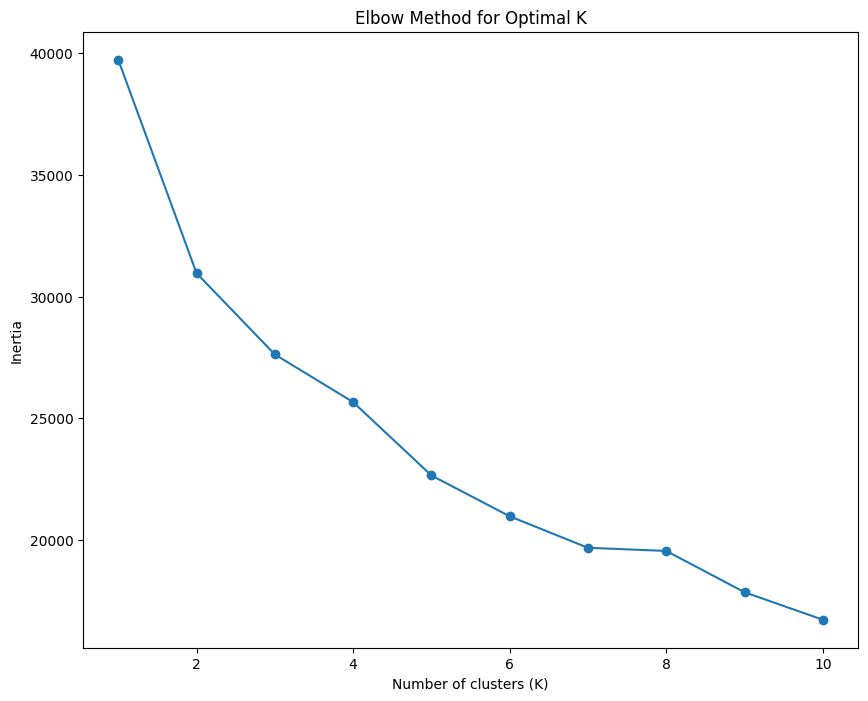

In [5]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia =[]
k_values = range(1,11)

for k in k_values:
    kmeans = KMeans(n_clusters=k , random_state = 42)
    kmeans.fit(train_data)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(10,8))
plt.plot(k_values , inertia , marker ='o')
plt.xlabel("Number of clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()

## Applying KMeans

In [6]:
optimal_k = 5
kmeans = KMeans(n_clusters =optimal_k , random_state=42)
df["Cluster"] = kmeans.fit_predict(df_scaled)

In [7]:
df

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,Cluster
0,0.910,1977,0.5000,['Idris Muhammad'],0.894,273067,0.5210,0,0KdzyvsBqX1HV3uLxGm2JV,0.772000,4,0.068,-7.048,1,Camby Bolongo,34,1977,0.0847,126.805,0
1,0.583,1976,0.9300,['Stan Getz'],0.585,182200,0.2720,0,1f4eO5waC6glPLXUhYKLm2,0.115000,11,0.128,-16.693,0,Just One of Those Things,26,1976,0.0802,90.104,1
2,0.647,1994,0.1570,"['Warren G', 'The Twinz']",0.878,179933,0.5200,1,1X07ZfF5KQt8dyJ5kAkVAQ,0.000000,7,0.173,-12.609,1,Recognize,38,1994-06-07,0.4030,90.744,0
3,0.196,1957,0.9370,['Red Garland Quintet'],0.463,925947,0.2870,0,5wmMDeM4qvLfwqLa2cvoks,0.837000,0,0.112,-11.758,0,Soul Junction,13,1957,0.0363,186.764,4
4,0.422,1921,0.9950,['Ignacio Corsini'],0.648,154240,0.0995,0,0SK1upzAP6NvIgF0uGh6z2,0.846000,11,0.112,-22.429,1,Flor Marchita - Remasterizado,0,1921-03-20,0.1050,71.978,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.612,2001,0.1840,['Alice Cooper'],0.533,186093,0.7030,0,5LY8GsHfU7G6tmeXxStEb6,0.000000,2,0.101,-6.364,1,No More Mr. Nice Guy - 2002 Remaster,42,2001,0.0423,128.761,2
4996,0.919,1999,0.0819,['Britney Spears'],0.714,200467,0.8520,0,6039GmVngyHmWfOuWOhjCK,0.000000,8,0.285,-6.570,1,Soda Pop,40,1999-01-12,0.0565,92.016,2
4997,0.345,2012,0.8820,['Issa Ibrahim'],0.215,167741,0.3190,0,4UuMkQLjxSgcrW2d1zFIJT,0.000013,0,0.228,-12.845,1,Susan,0,2012-09-03,0.0363,55.846,1
4998,0.286,1942,0.9900,"['Felix Mendelssohn', 'Paul Robeson Jr.', 'Law...",0.393,187267,0.0747,0,2rRxJzTQyvm5Wwj9ObnZvv,0.078400,10,0.102,-17.930,1,"The Lord God of Abraham, from Elijah, Op. 70",0,1942,0.0321,101.457,1


In [8]:
df['Cluster'].value_counts()

Cluster
2    1955
0    1242
1     978
4     636
3     189
Name: count, dtype: int64

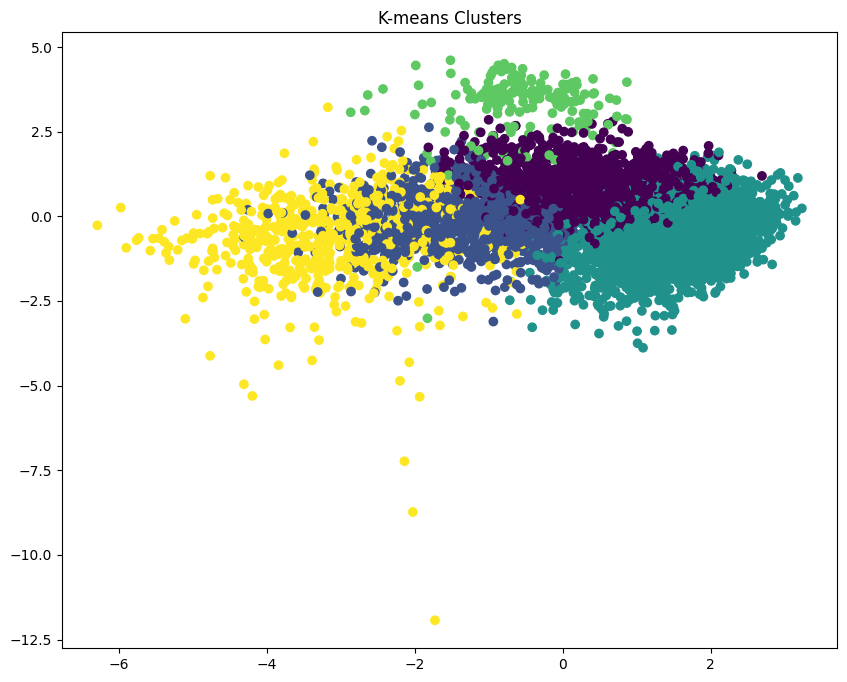

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

pca_result = pca.fit_transform(df_scaled)

plt.figure(figsize=(10,8))
plt.scatter(pca_result[:,0] , pca_result[:,1], c=df['Cluster'] , cmap='viridis' )
plt.title("K-means Clusters")
plt.show()

## Recommendation System With Kmeans

In [10]:
# from sklearn.metrics.pairwise import cosine_similarity
# import numpy as np

# def recommend_songs(song_index, df , num_recommendations =5):
#     # Get cluster for the input song
#     song_cluster = df[df['name']==song_name]['Cluster'].values[0]
#     # Filter songs in the same cluster
#     same_cluster_songs = df[df['Cluster']==song_cluster]

#     # Calculate similarity within the same cluster
#     song_index =same_cluster_songs[same_cluster_songs['name']==song_name].index[0]
#     cluster_features = same_cluster_songs[numerical_features]
#     similarity=cosine_similarity(cluster_features , cluster_features)

#     #Get top recommendations
#     similar_songs = np.argsort(similarity[song_index])[-(num_recommendations +1):-1][::-1]
#     recommendations=same_cluster_songs.iloc[similar_songs][['name','year','artists']]
#     return recommendations




# from sklearn.metrics.pairwise import cosine_similarity
# import numpy as np

# def recommend_songs(song_name, df, num_recommendations=5):
#     # Step 1 — Get cluster of the input song
#     song_cluster = df[df['name'] == song_name]['Cluster'].values[0]

#     # Step 2 — Filter songs in the same cluster
#     same_cluster_songs = df[df['Cluster'] == song_cluster]

#     # Step 3 — Find index of input song within the cluster
#     song_index = same_cluster_songs[same_cluster_songs['name'] == song_name].index[0]

#     # Step 4 — Compute similarity only on cluster songs
#     numerical_features = [
#         'danceability','energy','loudness','speechiness','acousticness',
#         'instrumentalness','liveness','valence','tempo','duration_ms'
#     ] # ← replace with your actual features!
#     cluster_features = same_cluster_songs[numerical_features]

#     similarity = cosine_similarity(cluster_features, cluster_features)

#     # Step 5 — Get top N similar songs
#     similar_songs = np.argsort(similarity[song_index])[-(num_recommendations+1):-1][::-1]

#     # Step 6 — return recommended songs
#     recommendations = same_cluster_songs.iloc[similar_songs][['name','year','artists']]
    
#     return recommendations


In [11]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

def recommend_songs(song_name, df, num_recommendations=5, use_cluster=True):
    """
    Recommend songs similar to song_name using cosine similarity on selected audio features.
    - Ensures the index used for similarity is the positional index inside the same_cluster_songs
      DataFrame (0..n-1) so it never goes out of bounds.
    - Normalizes features before computing cosine similarity.
    """

    # Validate song presence
    if song_name not in df['name'].values:
        raise ValueError(f"'{song_name}' not found in df['name']. Sample names: {df['name'].sample(5).tolist()}")

    # Choose features (tweak as needed)
    numerical_features = [
        'danceability','energy','loudness','speechiness','acousticness',
        'instrumentalness','liveness','valence','tempo','duration_ms'
    ]
    missing = [c for c in numerical_features if c not in df.columns]
    if missing:
        raise KeyError(f"Missing feature columns: {missing}")

    # Narrow by cluster if present and requested
    if use_cluster and 'Cluster' in df.columns:
        song_cluster = df.loc[df['name'] == song_name, 'Cluster'].values[0]
        same_cluster_songs = df[df['Cluster'] == song_cluster].copy()
    else:
        same_cluster_songs = df.copy()

    # Reset index so positions align with similarity matrix rows (0 .. n-1)
    same_cluster_songs = same_cluster_songs.reset_index(drop=True)

    # Find positional index of the input song _within_ same_cluster_songs
    matches = np.where(same_cluster_songs['name'].values == song_name)[0]
    if len(matches) == 0:
        # unlikely, but safe guard
        raise ValueError("Song not found inside the selected cluster/subset.")
    song_pos = int(matches[0])   # positional index (0..n-1)

    # Build feature matrix and normalize
    X = same_cluster_songs[numerical_features].fillna(0).values
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Compute cosine similarity matrix
    similarity = cosine_similarity(X_scaled, X_scaled)  # shape (n, n)

    # Sanity check: ensure song_pos is within bounds
    n = similarity.shape[0]
    if not (0 <= song_pos < n):
        raise IndexError(f"Positional song index {song_pos} out of bounds for similarity matrix with size {n}.")

    # Get similarity scores (highest first) and exclude the song itself
    sim_idx_desc = np.argsort(similarity[song_pos])[::-1]  # descending order
    sim_idx_desc = [i for i in sim_idx_desc if i != song_pos]

    # Adjust requested number if dataset smaller
    max_possible = len(sim_idx_desc)
    if num_recommendations > max_possible:
        num_recommendations = max_possible

    top_idx = sim_idx_desc[:num_recommendations]

    recommendations = same_cluster_songs.iloc[top_idx][['name','artists','year']]

    return recommendations


In [12]:
# Example Usage
input_song = "Danny Boy"
recommnended_songs = recommend_songs(input_song , df,num_recommendations =5)

print(f"Songs similar to '{input_song}':")
recommnended_songs

Songs similar to 'Danny Boy':


,name,artists,year
237,Ordinary People,['John Legend'],2005
234,Die Fledermaus - C. Haffner & R. Genée after M...,"['Johann Strauss II', 'Julius Patzak', 'Hilde ...",1951
897,What's Your Story Morning Glory?,"[""Anita O'Day"", 'Russ Garcia and His Orchestra']",1958
131,That's the Way It Is,['Jimmy Giuffre'],1957
336,The Island,['Paul Brady'],1985


In [13]:
input_song = "My Blue Heaven"
sampy = recommend_songs(input_song , df,num_recommendations =5)

print(f"Songs similar to '{input_song}':")
sampy

Songs similar to 'My Blue Heaven':


,name,artists,year
951,Gonna Buy Me a Dog - Original Stereo Version; ...,['The Monkees'],1966
322,Beach Boy Blues,['Elvis Presley'],1961
293,(You're The) Devil in Disguise,['Elvis Presley'],2002
145,We Can't Make It Right,['B.B. King'],1958
486,La Toalla,['Tito Rodriguez & His Orchestra'],1965


In [14]:
df.to_csv("clustered_df.csv")